In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time

In [2]:
%matplotlib notebook

In [140]:
def getdata(fname, gain_error=1.0):

    f = h5py.File(fname,'r')
    pos_data = np.array(f['pos_data'])
    quad_data = np.array(f['quad_data'])
    
    ## special comment for Alex:
    ## fsamp is the sampling frequency
    ## in here I read it from the file
    global fsamp
    fsamp = f.attrs['Fsamp']
    fsamp /= f.attrs['downsamp']
    
    ## reshape and extract xyz data
    ## assuming the data contains the correct amount of samples ordered in a correct way
    ## in the reprocessor a testing prcedure has to be implemented 
    pos_xyz = pos_data.reshape(-1,11).T[2:5]
    quad_data = quad_data.reshape(-1,12)
    
    return pos_xyz, quad_data

In [3]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [23]:
Ndata=20
fname = r'/home/data_transfer/data_from_windows/20190808/Bead1/InitialTest/Data%d.h5' % Ndata
#fname = r"/home/data_transfer/data_from_windows/20190813/Bead1/Discharge/Discharge_%d.h5" % Ndata
#fname = r"/home/data_transfer/data_from_windows/20190724/Bead1/TransFunc/TransFuncY_%d.h5" % Ndata
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
fsamp=5000
res=5000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
xfnsd=np.sqrt(xpsd)*2.86e-21
yfnsd=np.sqrt(ypsd)*1.93e-21
zfnsd=np.sqrt(zpsd)*2.93e-18

No cantilever data


<IPython.core.display.Javascript object>


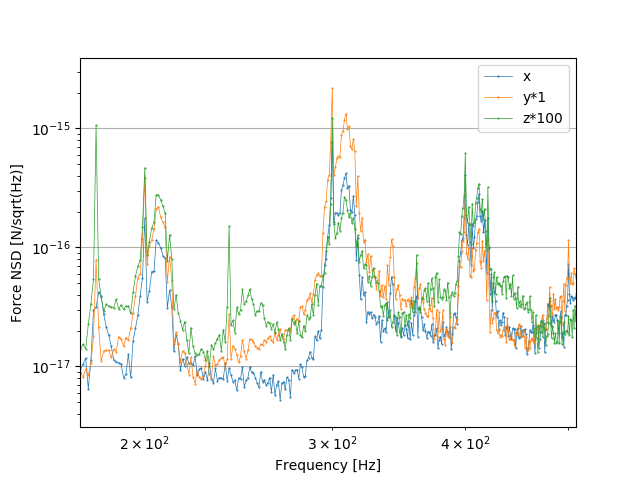

In [24]:
_,ax = plt.subplots()
ax.loglog(freqs, xfnsd, '.-', label="x",markersize=1,linewidth=0.5)
ax.loglog(freqs, yfnsd, '.-', label="y*1",markersize=1,linewidth=0.5)
ax.loglog(freqs, zfnsd, '.-', label="z*100",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Force NSD [N/sqrt(Hz)]')
plt.xlim(1,2500)
plt.ylim(1e-18,1e-14)
plt.grid(True)
ofname='../../Results/AkioK/DataFNSD%d.png' % Ndata
#ofname='../../Results/AkioK/Discharge%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata

plt.savefig(ofname)

In [16]:
##code for plotting two graphs at the same time.

In [109]:
Ndata1=40
fname1 = r"/home/data_transfer/data_from_windows/20190812/Bead1/InitialTest/Data%d.h5" % Ndata1
#fname1 = r"/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_%d.h5" % Ndata1
data1, _ = getdata(fname1)
res = 2**12
#res=50000
data_det1=signal.detrend(data1)
xpsd1, freqs1 = matplotlib.mlab.psd(data_det1[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd1, freqs1 = matplotlib.mlab.psd(data_det1[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd1, freqs1 = matplotlib.mlab.psd(data_det1[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
xfnsd1=np.sqrt(xpsd1)*2.86e-21
yfnsd1=np.sqrt(ypsd1)*1.93e-21
zfnsd1=np.sqrt(zpsd1)*2.93e-18

In [110]:
Ndata2=41
fname2 = r"/home/data_transfer/data_from_windows/20190812/Bead1/InitialTest/Data%d.h5" % Ndata2
#fname2 = r"/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_%d.h5" % Ndata2
data2, _ = getdata(fname2)
data_det2=signal.detrend(data2)
xpsd2, freqs2 = matplotlib.mlab.psd(data_det2[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd2, freqs2 = matplotlib.mlab.psd(data_det2[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd2, freqs2 = matplotlib.mlab.psd(data_det2[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
xfnsd2=np.sqrt(xpsd2)*2.86e-21
yfnsd2=np.sqrt(ypsd2)*1.93e-21
zfnsd2=np.sqrt(zpsd2)*2.93e-18

<IPython.core.display.Javascript object>


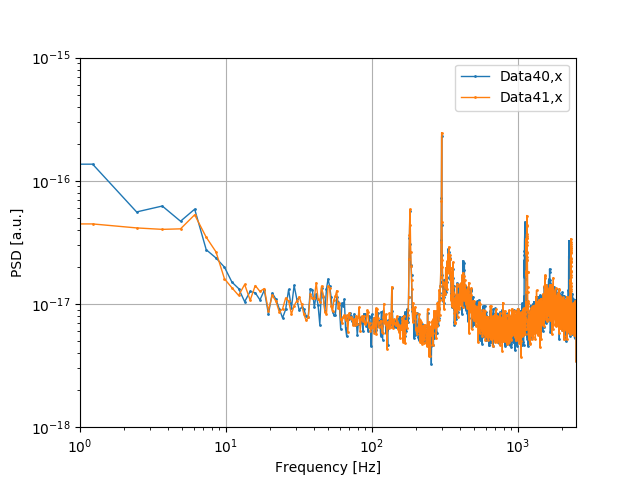

In [111]:
_,ax = plt.subplots()
label1='Data%d,x' % Ndata1
label2='Data%d,x' % Ndata2
ax.loglog(freqs1, xfnsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, xfnsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname='../../Results/AkioK/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
plt.savefig(ofname)

<IPython.core.display.Javascript object>


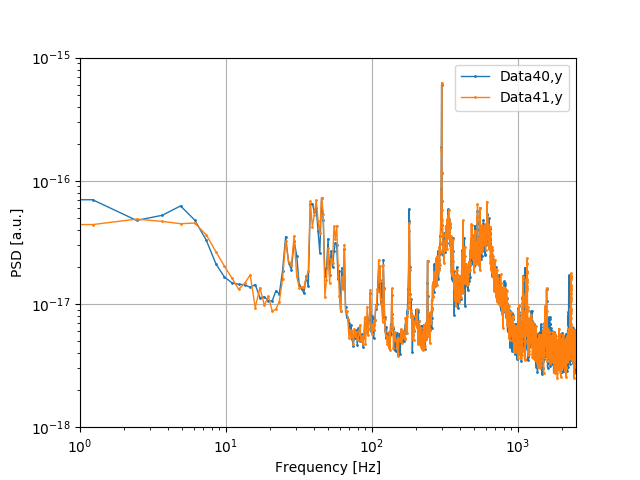

In [112]:
_,ax = plt.subplots()
label1='Data%d,y' % Ndata1
label2='Data%d,y' % Ndata2
ax.loglog(freqs1, yfnsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, yfnsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname='../../Results/AkioK/PlotDataY%d_%d.png' %(Ndata1, Ndata2)
plt.savefig(ofname)

<IPython.core.display.Javascript object>


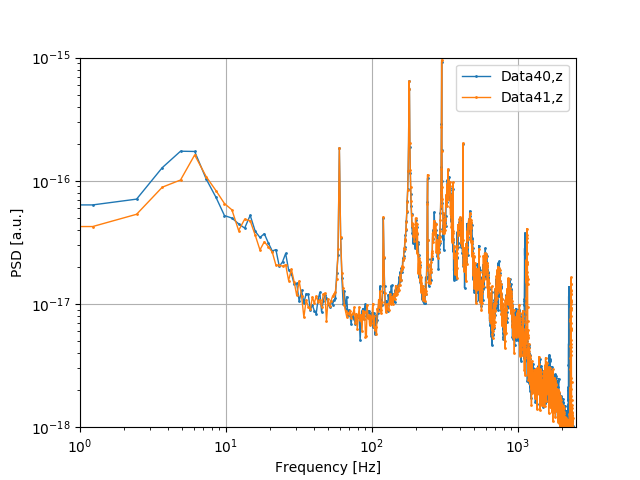

In [113]:
_,ax = plt.subplots()
label1='Data%d,z' % Ndata1
label2='Data%d,z' % Ndata2
ax.loglog(freqs1, zfnsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, zfnsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname='../../Results/AkioK/PlotDataZ%d_%d.png' %(Ndata1, Ndata2)
plt.savefig(ofname)

In [34]:
##code for Transfer Function

In [118]:
##X preparation
NdataX=1
fname = r"/home/data_transfer/data_from_windows/20190812/Bead1/TransFunc/TransFuncX_%d.h5" % NdataX
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
res=50000
data_det=signal.detrend(data)
fbase=7

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0X=np.sqrt(xpsd[fbase*10])
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)

No cantilever data


In [119]:
##Y preparataion
NdataY=2 
fname = r"/home/data_transfer/data_from_windows/20190812/Bead1/TransFunc/TransFuncY_%d.h5" % NdataY 
BDF = BeadDataFile.BeadDataFile(fname) 
data = BDF.xyz 
res=50000 
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none) 
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none) 
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none) 
Noise0Y=np.sqrt(ypsd[fbase*10]) 
YnoiseX=np.sqrt(xpsd) 
YnoiseY=np.sqrt(ypsd) 
YnoiseZ=np.sqrt(zpsd)

No cantilever data


In [120]:
##Z preparation
NdataZ=3
fname = r"/home/data_transfer/data_from_windows/20190812/Bead1/TransFunc/TransFuncZ_%d.h5" % NdataZ
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
res=50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0Z=np.sqrt(zpsd[fbase*10])
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)

No cantilever data


In [121]:
q=10
V=0.65
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
Nharm=100

FnoiseXX=XnoiseX/Noise0X*F
FnoiseXY=XnoiseY/Noise0Y*F
FnoiseXZ=XnoiseZ/233*7.26e-16
FnoiseYX=YnoiseX/Noise0X*F
FnoiseYY=YnoiseY/Noise0Y*F
FnoiseYZ=YnoiseZ/Noise0Z*F
FnoiseZX=ZnoiseX/Noise0X*F
FnoiseZY=ZnoiseY/Noise0Y*F
FnoiseZZ=ZnoiseZ/Noise0Z*F

TFXX=np.zeros(Nharm)
TFXY=np.zeros(Nharm)
TFXZ=np.zeros(Nharm)
TFYX=np.zeros(Nharm)
TFYY=np.zeros(Nharm)
TFYZ=np.zeros(Nharm)
TFZX=np.zeros(Nharm)
TFZY=np.zeros(Nharm)
TFZZ=np.zeros(Nharm)

FreqTF=np.zeros(Nharm)
for i in range(Nharm):
    FreqTF[i]=fbase*(i+1)
    TFXX[i]=FnoiseXX[fbase*10*(i+1)]
    TFXY[i]=FnoiseXY[fbase*10*(i+1)]
    TFXZ[i]=FnoiseXZ[fbase*10*(i+1)]
    TFYX[i]=FnoiseYX[fbase*10*(i+1)]
    TFYY[i]=FnoiseYY[fbase*10*(i+1)]
    TFYZ[i]=FnoiseYZ[fbase*10*(i+1)]
    TFZX[i]=FnoiseZX[fbase*10*(i+1)]
    TFZY[i]=FnoiseZY[fbase*10*(i+1)]
    TFZZ[i]=FnoiseZZ[fbase*10*(i+1)]

In [124]:
ofname = "../../Results/AkioK/TFBead%d%d%d.txt" %(NdataX,NdataY,NdataZ)
f1 = open(ofname,"a")
for i in range(Nharm):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [ ]:
## Plotting the force sensitivity with transfer function compensation

In [125]:
Ndata=42
fname = r"/home/data_transfer/data_from_windows/20190812/Bead1/InitialTest/Data%d.h5" % Ndata

BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
res = 2**12
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)

w0x=349.115
gx=84.4765
w0y=299.671
gy=36.8057
w0z=307.187
gz=279.037

f0=151
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

F=2.42e-16

xnsd=np.sqrt(xpsd)*(F/8.46e4)*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*(F/1.26e5)*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*(F/99.4)*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

No cantilever data


<IPython.core.display.Javascript object>


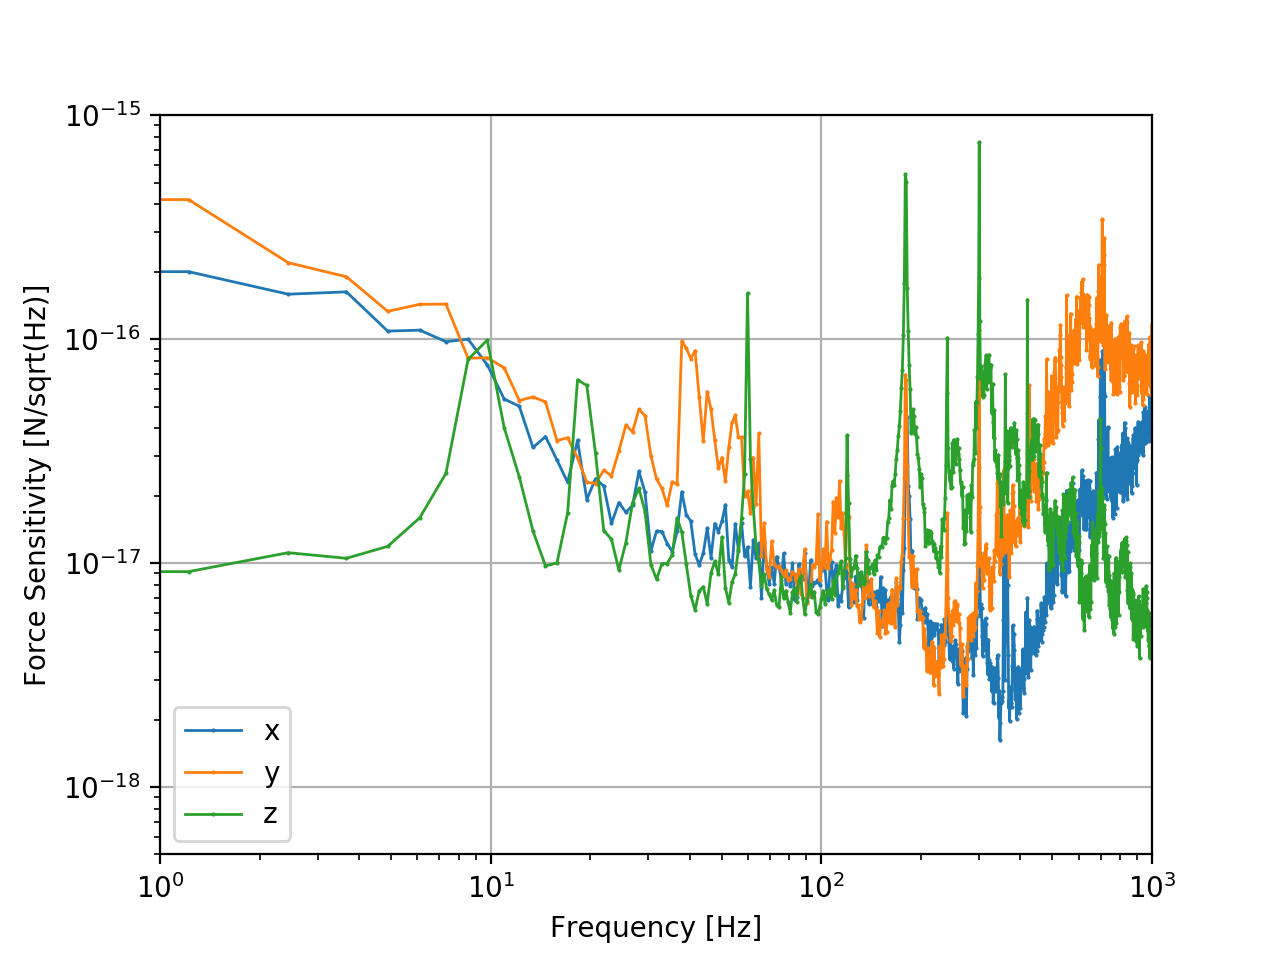

In [126]:
_,ax = plt.subplots()
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, ynsd, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(freqs, znsd, '.-', label="z",markersize=1,linewidth=1)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Force Sensitivity [N/sqrt(Hz)]')
plt.xlim(1,1000)
plt.ylim(5e-19,1e-15)
plt.grid(True)
ofname='../../Results/AkioK/ForceSensitivity%d.png' % Ndata

plt.savefig(ofname)

In [162]:
##Force Calibration with single freq

In [8]:
for i in range(117,127):
    Ndata=i
    #fname = r'/home/data_transfer/data_from_windows/20190805/NoBead/InitialTest/Data%d.h5' % Ndata
    fname = r"/home/data_transfer/data_from_windows/20190805/Bead2/Discharge/Discharge_%d.h5" % Ndata
    #fname = r"/home/data_transfer/data_from_windows/20190724/Bead1/TransFunc/TransFuncY_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz
    fsamp=5000
    res = 2**12
    res=50000
    data_det=signal.detrend(data)
    y_1000=1*data_det[1]
    z_1000=1*data_det[2]

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res,window=mlab.window_none)
    print(np.sqrt(zpsd[1511]))

2.0274095587485115
0.9024697476066293
0.5690787373458505
2.1885036347337614
1.9958861145474016
2.2108642678179016
1.2159570607847787
2.869153920948934
0.855669856326042
1.232567308875981


In [17]:
## shaking analysis with FFT, force sensitivity compensated

/usr/lib/python3/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


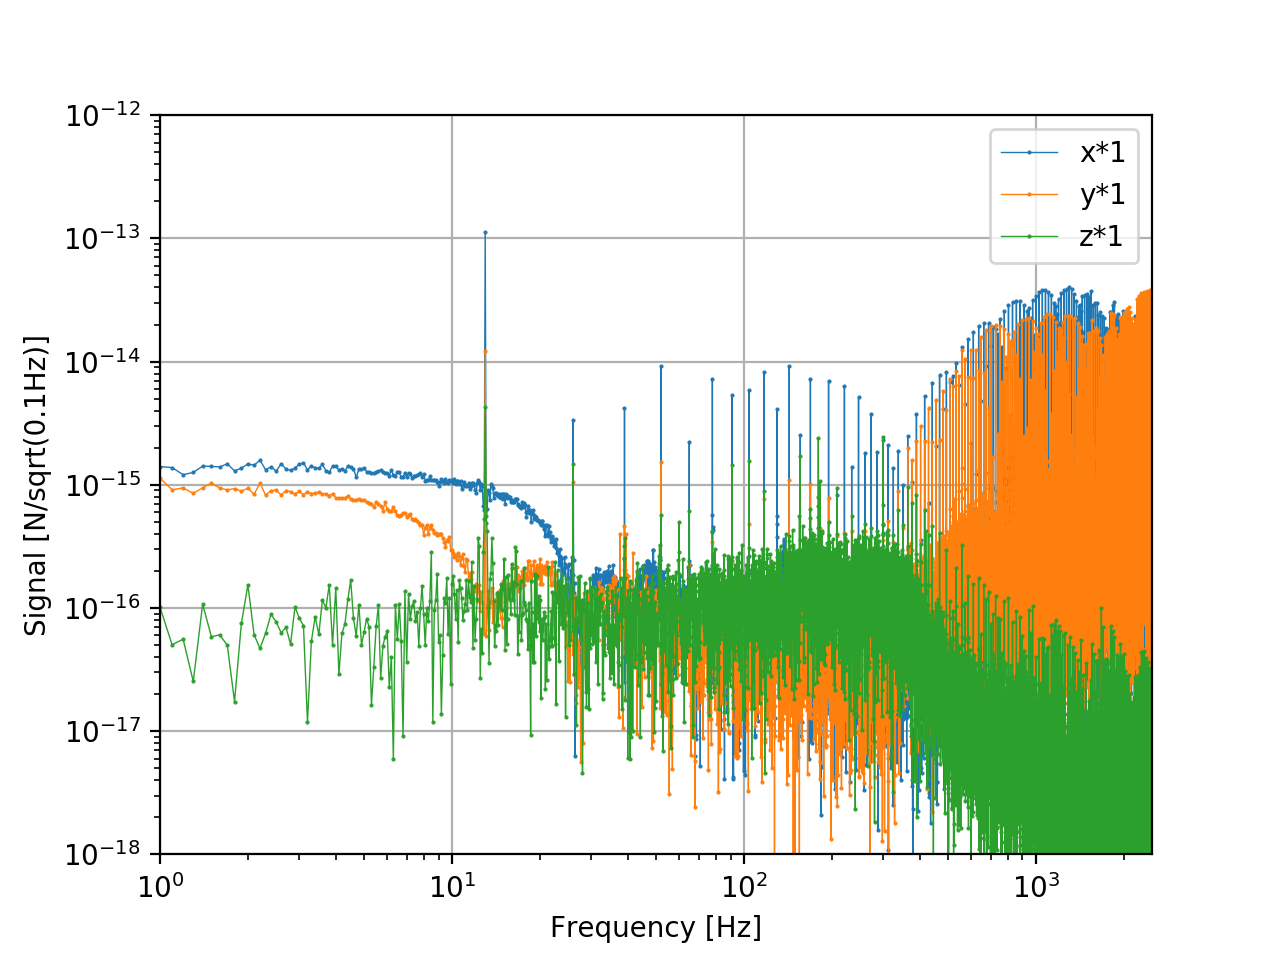

In [129]:
Nint=2
Nave=3
for k in range(140,141):
    Ndata=k
    fname = r'/home/data_transfer/data_from_windows/20190812/Bead1/Shaking/Shaking%d_0.h5' % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(res/2)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    w0x=349.115
    gx=84.4765
    w0y=299.671
    gy=36.8057
    w0z=307.187
    gz=279.037


    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    F=2.42e-16
    
    xnsd=np.sqrt(xpsd)*(F/8.46e4)*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*(F/1.26e5)*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*(F/99.4)*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)
    
    xphase=np.arctan(xFFT.imag/xFFT.real)
    yphase=np.arctan(yFFT.imag/yFFT.real)
    zphase=np.arctan(zFFT.imag/zFFT.real)
    
    _,ax = plt.subplots()
    ax.loglog(freqs, xnsd, '.-', label="x*1",markersize=1,linewidth=0.5)
    ax.loglog(freqs, ynsd, '.-', label="y*1",markersize=1,linewidth=0.5)
    ax.loglog(freqs, znsd, '.-', label="z*1",markersize=1,linewidth=0.5)
    ax.legend()
    ax.set_xlabel('Frequency [Hz]')
    ax.set_ylabel('Signal [N/sqrt(0.1Hz)]')
    plt.xlim(1,2500)
    plt.ylim(1e-18,1e-12)
    plt.grid(True)
    ofname='../../Results/AkioK/ShakingNSD%d.png' % Ndata
    plt.savefig(ofname)

    ofname = "../../Results/AkioK/ShakeNSDPhase%d.txt" % Ndata
    Fshake=13
    f1 = open(ofname,"a")
    
    for i in range(1,int(fsamp/2/Fshake)+1):
        Intx=xFFT[Fshake*10*i]
        IntNSDx=xnsd[Fshake*10*i]
        Inty=yFFT[Fshake*10*i]
        IntNSDy=ynsd[Fshake*10*i]
        Intz=zFFT[Fshake*10*i]
        IntNSDz=znsd[Fshake*10*i]

        for j in range(1,(Nint)):
            Intx+=xFFT[Fshake*10*i+j]+xFFT[Fshake*10*i-j]
            IntNSDx+=xnsd[Fshake*10*i+j]+xnsd[Fshake*10*i-j]
            Inty+=yFFT[Fshake*10*i+j]+yFFT[Fshake*10*i-j]
            IntNSDy+=ynsd[Fshake*10*i+j]+ynsd[Fshake*10*i-j]
            Intz+=zFFT[Fshake*10*i+j]+zFFT[Fshake*10*i-j]
            IntNSDz+=znsd[Fshake*10*i+j]+znsd[Fshake*10*i-j]

        SumNoiseX=0
        SumNoiseY=0
        SumNoiseZ=0
        for j in range(Nint+1,Nave+1+Nint):
            SumNoiseX+=(xnsd[Fshake*10*i+j]+xnsd[Fshake*10*i-j])
            SumNoiseY+=(ynsd[Fshake*10*i+j]+ynsd[Fshake*10*i-j])
            SumNoiseZ+=(znsd[Fshake*10*i+j]+znsd[Fshake*10*i-j])
        AveNoiseX=SumNoiseX/(Nave*2)
        AveNoiseY=SumNoiseY/(Nave*2)
        AveNoiseZ=SumNoiseZ/(Nave*2)
        SigAmpX=IntNSDx-AveNoiseX*(Nint*2+1)
        SigPhaX=np.angle(Intx) 
        SigAmpY=IntNSDy-AveNoiseY*(Nint*2+1)
        SigPhaY=np.angle(Inty) 
        SigAmpZ=IntNSDz-AveNoiseZ*(Nint*2+1)
        SigPhaZ=np.angle(Intz) 
        
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, SigAmpY, SigAmpZ, SigPhaX, SigPhaY, SigPhaZ))
    f1.close()

In [130]:
##getting the spinning data

In [152]:
Ndata=137
fname = r'/home/data_transfer/data_from_windows/20190812/Bead1/Shaking/Shaking%d_0.h5' % Ndata
BDF = BeadDataFile.BeadDataFile(fname)
fsamp=5000
res=50000
data=BDF

AttributeError: 'BeadDataFile' object has no attribute 'spin_data'

In [ ]:
BDF.